In [1]:
import ROOT
from ROOT import gStyle
#from ROOT import RDataFrame
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.26/04


In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({"axes.grid" : True, "grid.color": "whitesmoke"})
plt.rcParams['axes.axisbelow'] = True

In [51]:
#Open double ROOT file 
import uproot
file_path = '/Users/bertabeltran/mist/data/efficiency_study/new_efficiency_sec3_double/RAW/SDataR_new_efficiency_sec3_double.root'
#file_path ="/Users/bertabeltran/mist/data/efficiency_test/sec5_double_eff_test_spectra_waves/RAW/DataR_sec5_double_eff_test_spectra_waves.root"
file=uproot.open(file_path)
tree=file["Data_R"]
print(tree.keys())

#Load data for channels and timestamps
#timestamps = tree["Timestamp"].array(library = "np")*10**(-3) #Convert picoseconds to nano
timestamps = tree["Timestamp"].array(library = "np") # picoseconds
channel = tree["Channel"].array(library = "np")
energy = tree["Energy"].array(library = "np")
flags = tree["Flags"].array(library = "np")

['Channel', 'Timestamp', 'Board', 'Energy', 'EnergyShort', 'Flags', 'Probe', 'Samples']


In [52]:
len(energy)

13090

In [53]:
len(channel)

13090

In [54]:
#Create masks for channels
CH0_mask = channel == 0
CH1_mask = channel == 1

#Get timestamps for each channel (time in picoseconds from the begining of the run)
CH0_timestamps = timestamps[CH0_mask]
CH1_timestamps = timestamps[CH1_mask]


#Calculate energy of events on each channel
CH0_energy = energy[CH0_mask]
CH1_energy = energy[CH1_mask]

#calcuate the time difference between events in chn 0
CH0_time_diff = np.diff(CH0_timestamps)
CH0_time_diff=CH0_time_diff/1e+12 #make it seconds 

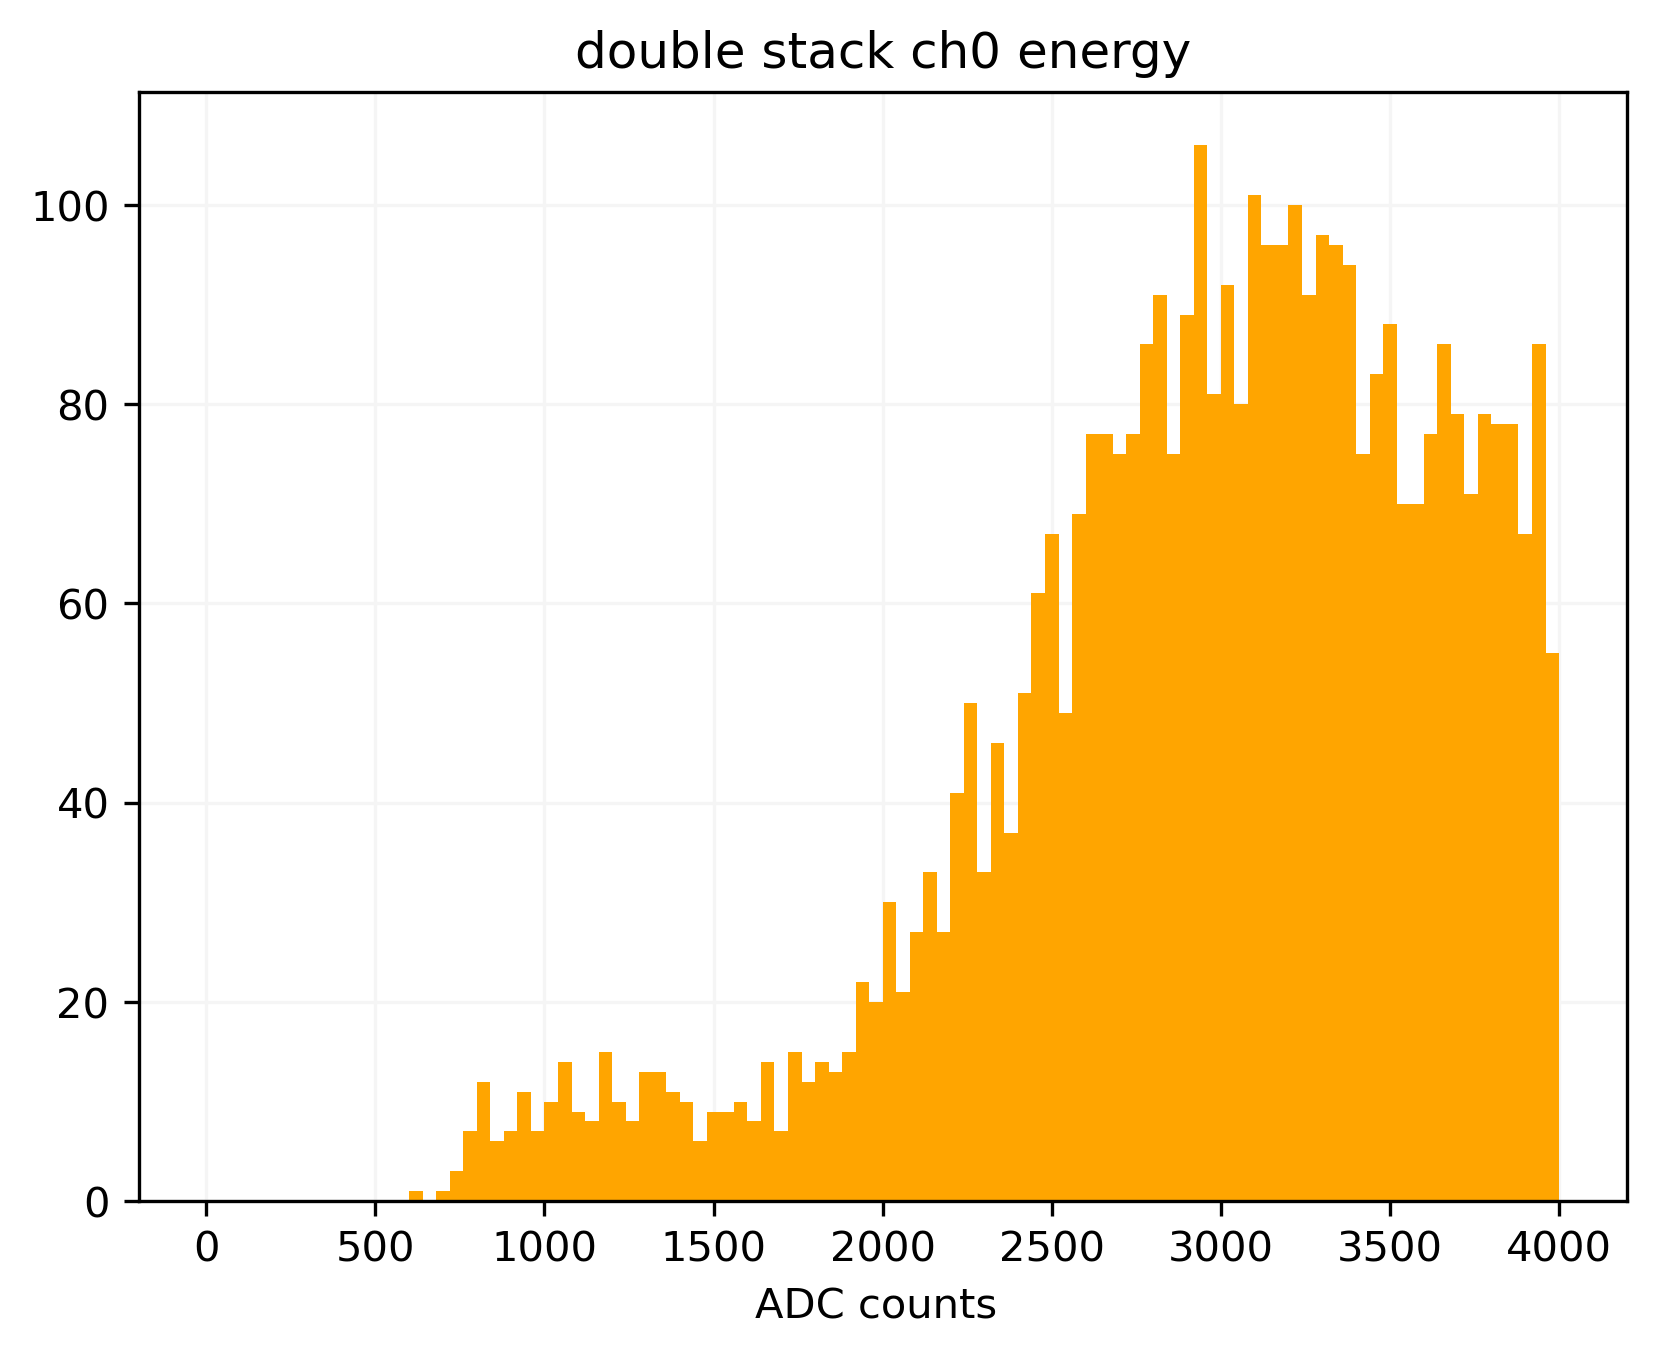

In [55]:
#need to change the type as for some reasong the default one is funny and hist does not like it 
CH0_energy=CH0_energy.astype(np.int64)
plt.hist(CH0_energy, bins = 100, range=(0,4000), histtype='stepfilled',color ='orange')
#plt.hist(CH0_time_diff, bins = 100,range=(0,4), histtype='stepfilled' ,density=True,color ='orange')
ax=plt.gca()
ax.set_title("double stack ch0 energy")
ax.set_xlabel("ADC counts ")
#plt.yscale('log')


plt.show()

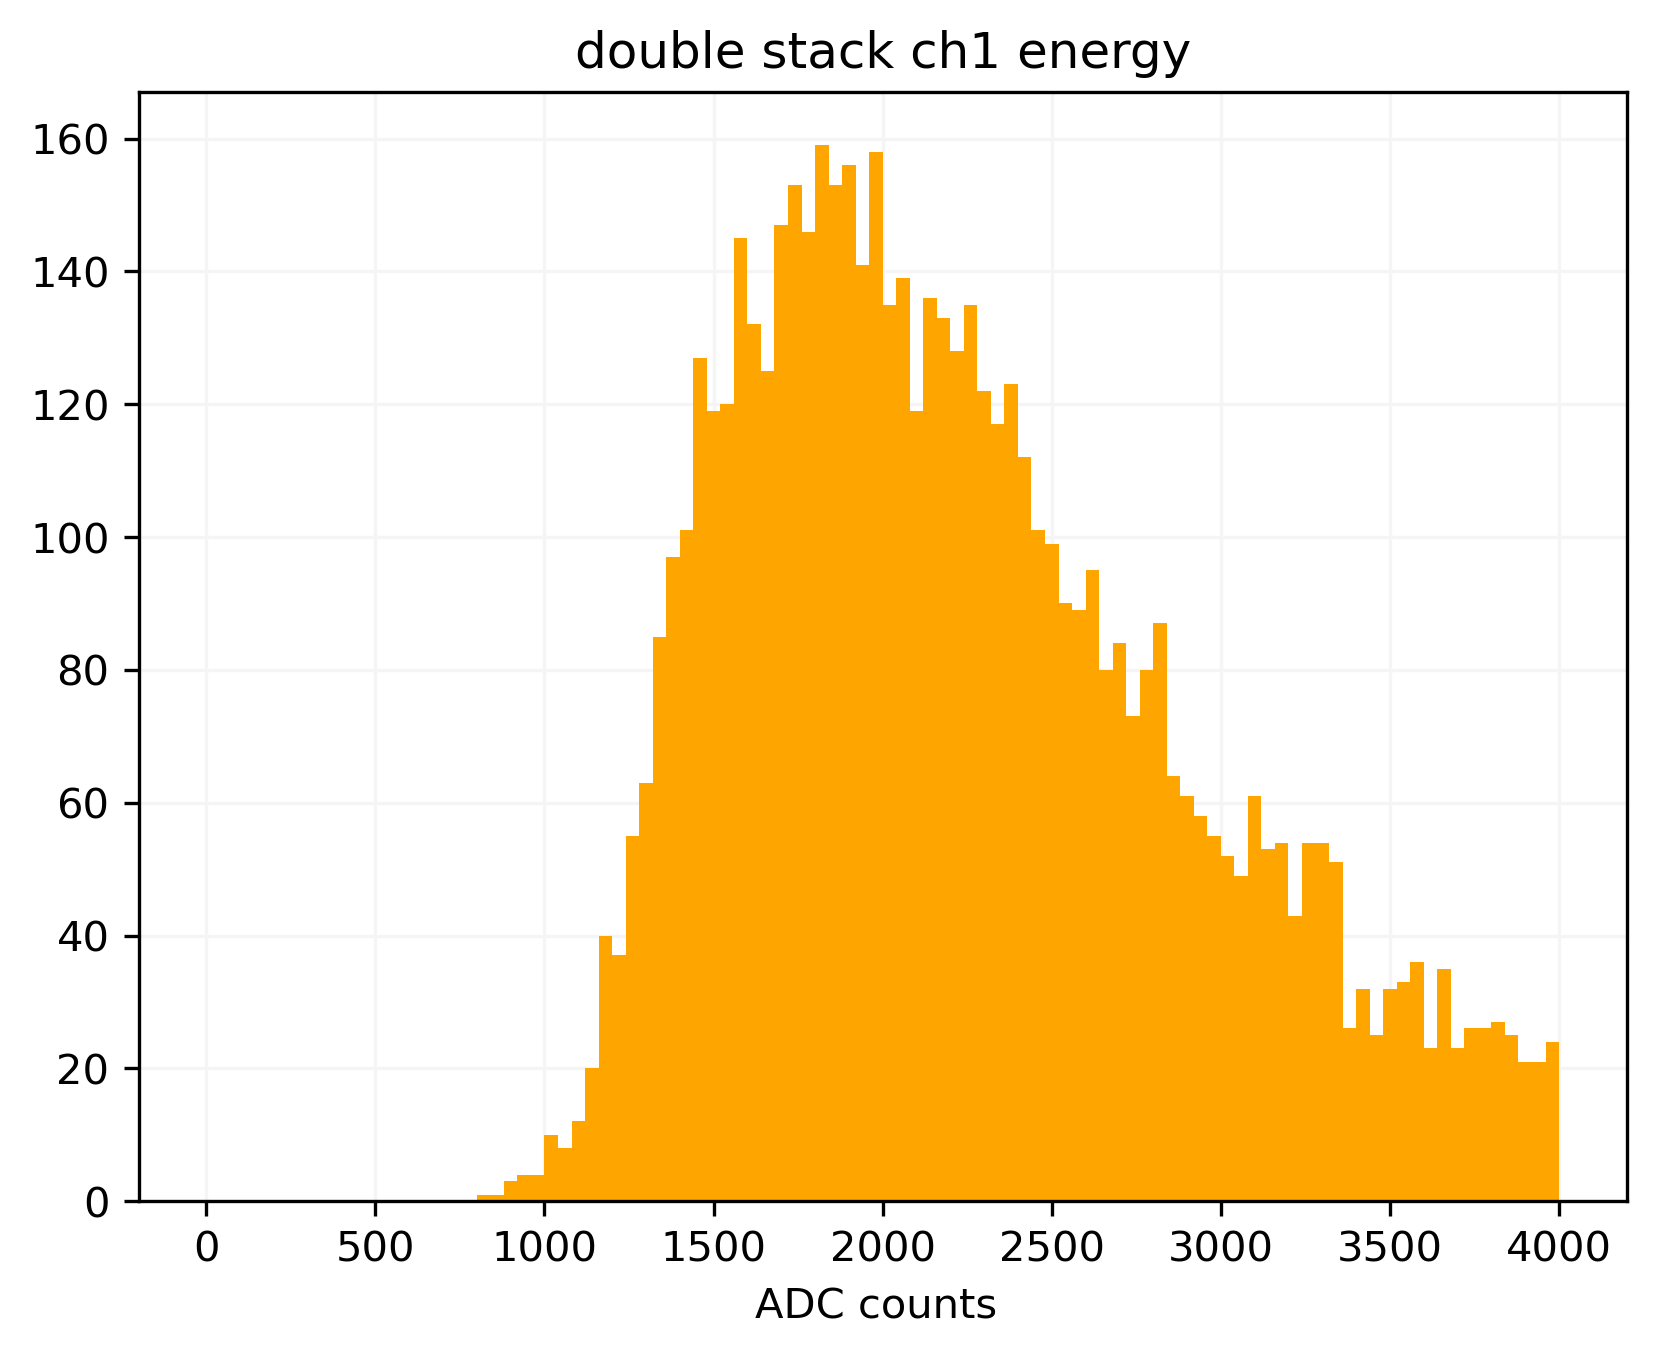

In [56]:
#need to change the type as for some reasong the default one is funny and hist does not like it 
CH1_energy=CH1_energy.astype(np.int64)
plt.hist(CH1_energy, bins = 100, range=(0,4000), histtype='stepfilled',color ='orange')
#plt.hist(CH0_time_diff, bins = 100,range=(0,4), histtype='stepfilled' ,density=True,color ='orange')
ax=plt.gca()
ax.set_title("double stack ch1 energy")
ax.set_xlabel("ADC counts ")
#plt.yscale('log')


plt.show()

In [57]:
len(CH0_timestamps)

6545

In [58]:
len(CH1_timestamps)

6545

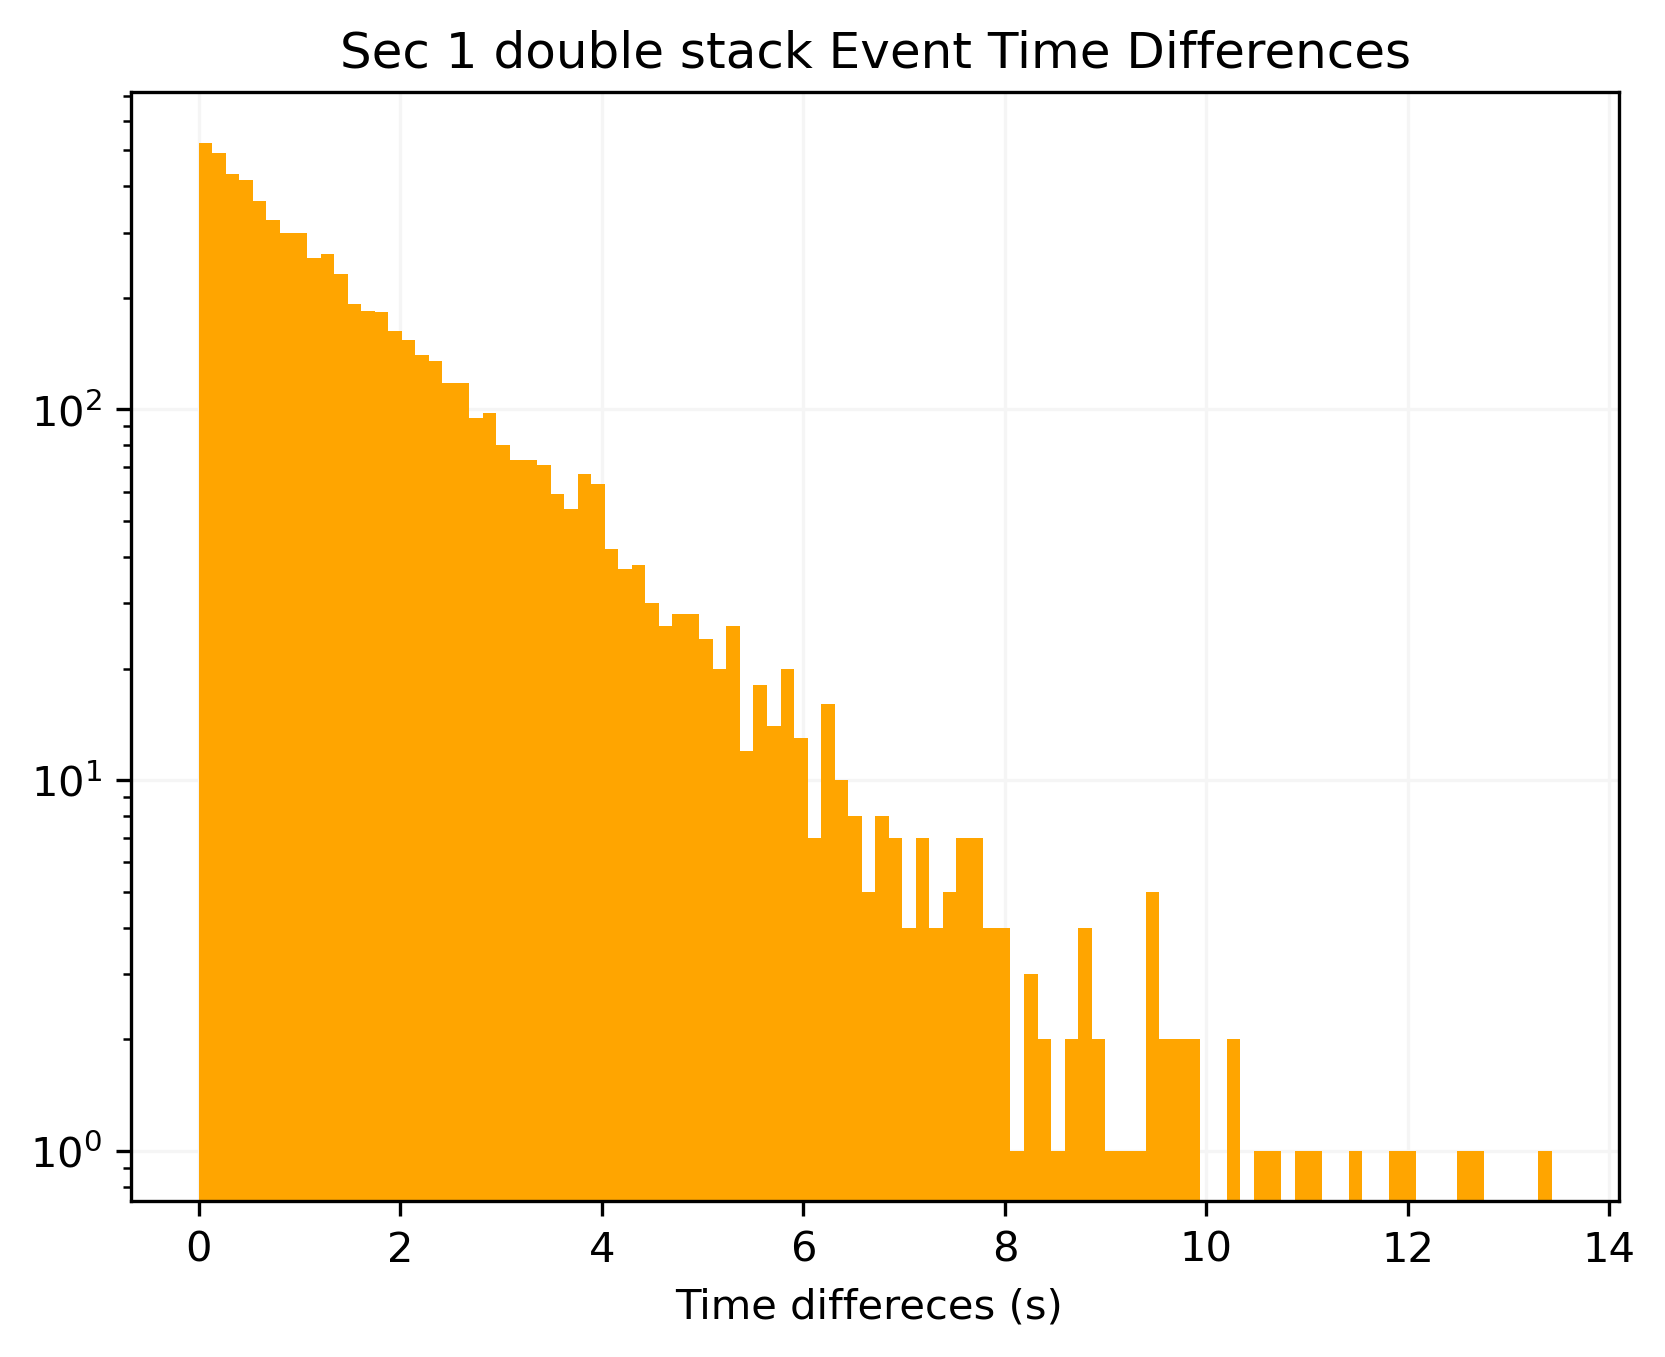

In [59]:
# plot the time differences distribution to see if it looks right 

plt.hist(CH0_time_diff, bins = 100, histtype='stepfilled',color ='orange')
#plt.hist(CH0_time_diff, bins = 100,range=(0,4), histtype='stepfilled' ,density=True,color ='orange')
ax=plt.gca()
ax.set_title("Sec 1 double stack Event Time Differences")
ax.set_xlabel("Time differeces (s) ")
plt.yscale('log')


plt.show()


Expo function coefficients:
[ 6.17940409 -0.61444061]
Covariance of coefficients:
[[ 6.64330315e-05 -4.08576992e-05]
 [-4.08576992e-05  5.01187002e-05]]
rate err 0.007079456207105607


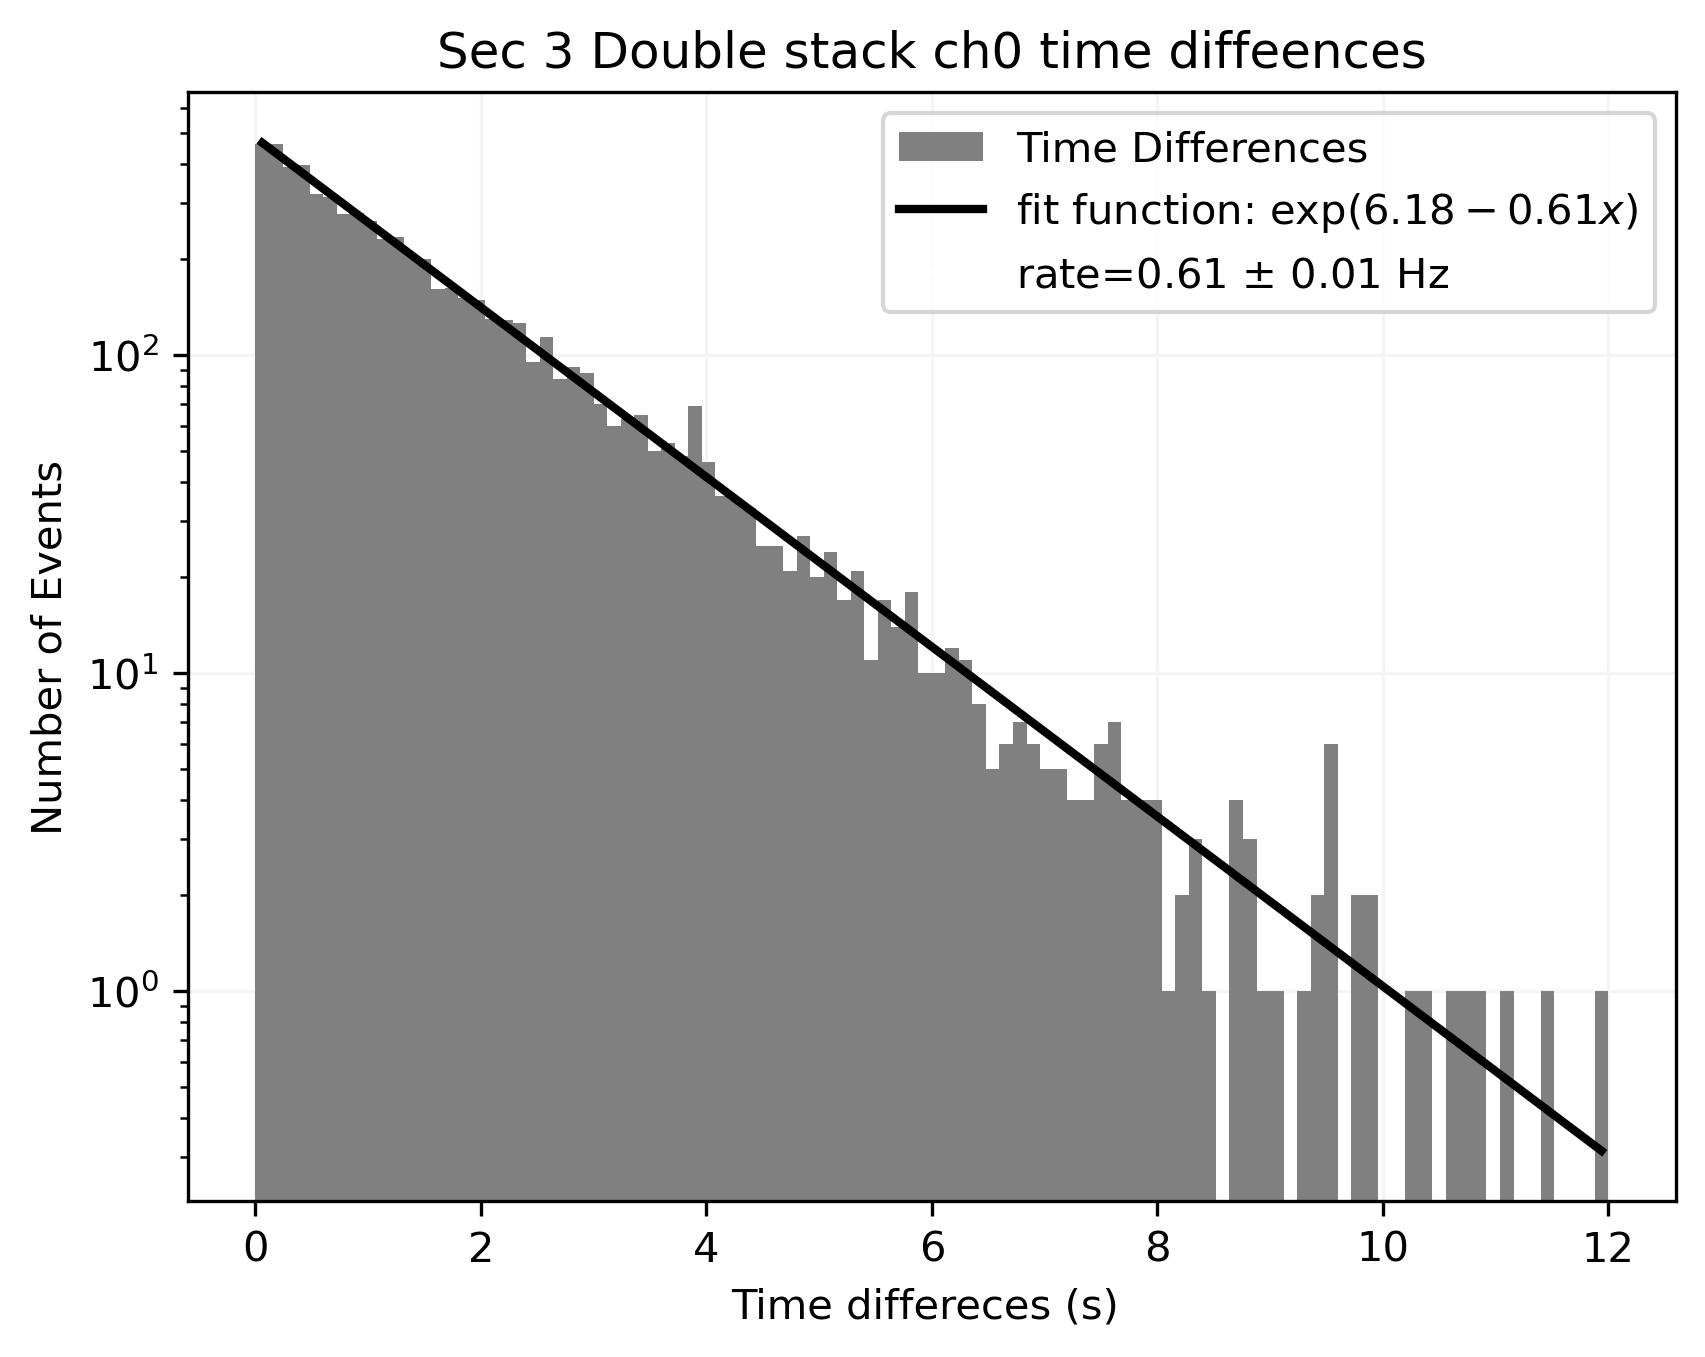

In [69]:
# now I am going to try and fit the time differences plot with curve_fit

import numpy as np
from scipy.optimize import curve_fit
#firts I define the exponential fucntion that I will be fitting 
def expo(x, a, b):
    return  np.exp(a+(b*x))

#here I caculate the bin centers for the fit               
def bincenters(bins):
    return (bins[1:] + bins[:-1]) / 2
                   
# define the histogram that I will be fitting to and return the bin contents and the bid edeges    
bin_cont, bin_edges, patches = plt.hist(CH0_time_diff, bins = 100, range=(0,12), histtype='stepfilled' , color ='gray',label ="Time Differences")
                   
# here I do the fit a return the fit values     
param, param_cov = curve_fit(expo, bincenters(bin_edges),bin_cont)
                   
# print the values     
print("Expo function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)
# To compute one standard deviation errors on the parameters we need to use 
perr = np.sqrt(np.diag(param_cov))
print ("rate err", perr[1])

# now I also want to draw the fitted function on top of the histogram 
fit_func= expo(bincenters(bin_edges),param[0] ,param[1] )
plt.plot(bincenters(bin_edges), fit_func, 'black', linewidth=2, label ="fit function: exp$({:.2f} {:.2f}x)$".format(param[0] ,param[1]))       

#fit_eq= "exp$({:.2f} {:.2f}x)$".format(param[0] ,param[1])

ax=plt.gca()
#ax.text(1, 1000, fit_eq, fontsize=15)
#ax.text(1.3, 500, "rate={:.2f} $\\pm$ {:.2f} cps".format(abs(param[1]), perr[1]), fontsize=15)

ax.plot([],[],label="rate={:.2f} $\\pm$ {:.2f} Hz".format(abs(param[1]), perr[1]), color='w')
plt.legend()
plt.yscale('log')
ax.set_title("Sec 3 Double stack ch0 time diffeences")
ax.set_xlabel("Time differeces (s) ")
ax.set_ylabel('Number of Events')
plt.show()

In [62]:

#Open triple ROOT file 
file_path_3 = "/Users/bertabeltran/mist/data/efficiency_study/new_efficiency_sec3_triple/RAW/SDataR_new_efficiency_sec3_triple.root"
file3=uproot.open(file_path_3)
tree3=file3["Data_R"]
print(tree3.keys())

#Load data for channels and timestamps
#timestamps = tree["Timestamp"].array(library = "np")*10**(-3) #Convert picoseconds to nano
timestamps3 = tree3["Timestamp"].array(library = "np") # picoseconds
channel3 = tree3["Channel"].array(library = "np")
energy3 = tree3["Energy"].array(library = "np")
flags3 = tree3["Flags"].array(library = "np")

['Channel', 'Timestamp', 'Board', 'Energy', 'EnergyShort', 'Flags', 'Probe', 'Samples']


In [63]:
#Create masks for channels
CH2_mask = channel3 == 2


#Get timestamps for each channel (time in picoseconds from the begining of the run)
CH2_timestamps = timestamps3[CH2_mask]


#Calculate energy of events on each channel
CH2_energy = energy3[CH2_mask]


#calcuate the time difference between events in chn 0
CH2_time_diff = np.diff(CH2_timestamps)
CH2_time_diff_sec=CH2_time_diff/1e+12 #make it seconds 
CH2_timestamps

array([    6064470749624,     6334555107749,     7396077511374, ...,
       10687376728678124, 10688306833337000, 10691300474920499],
      dtype=uint64)

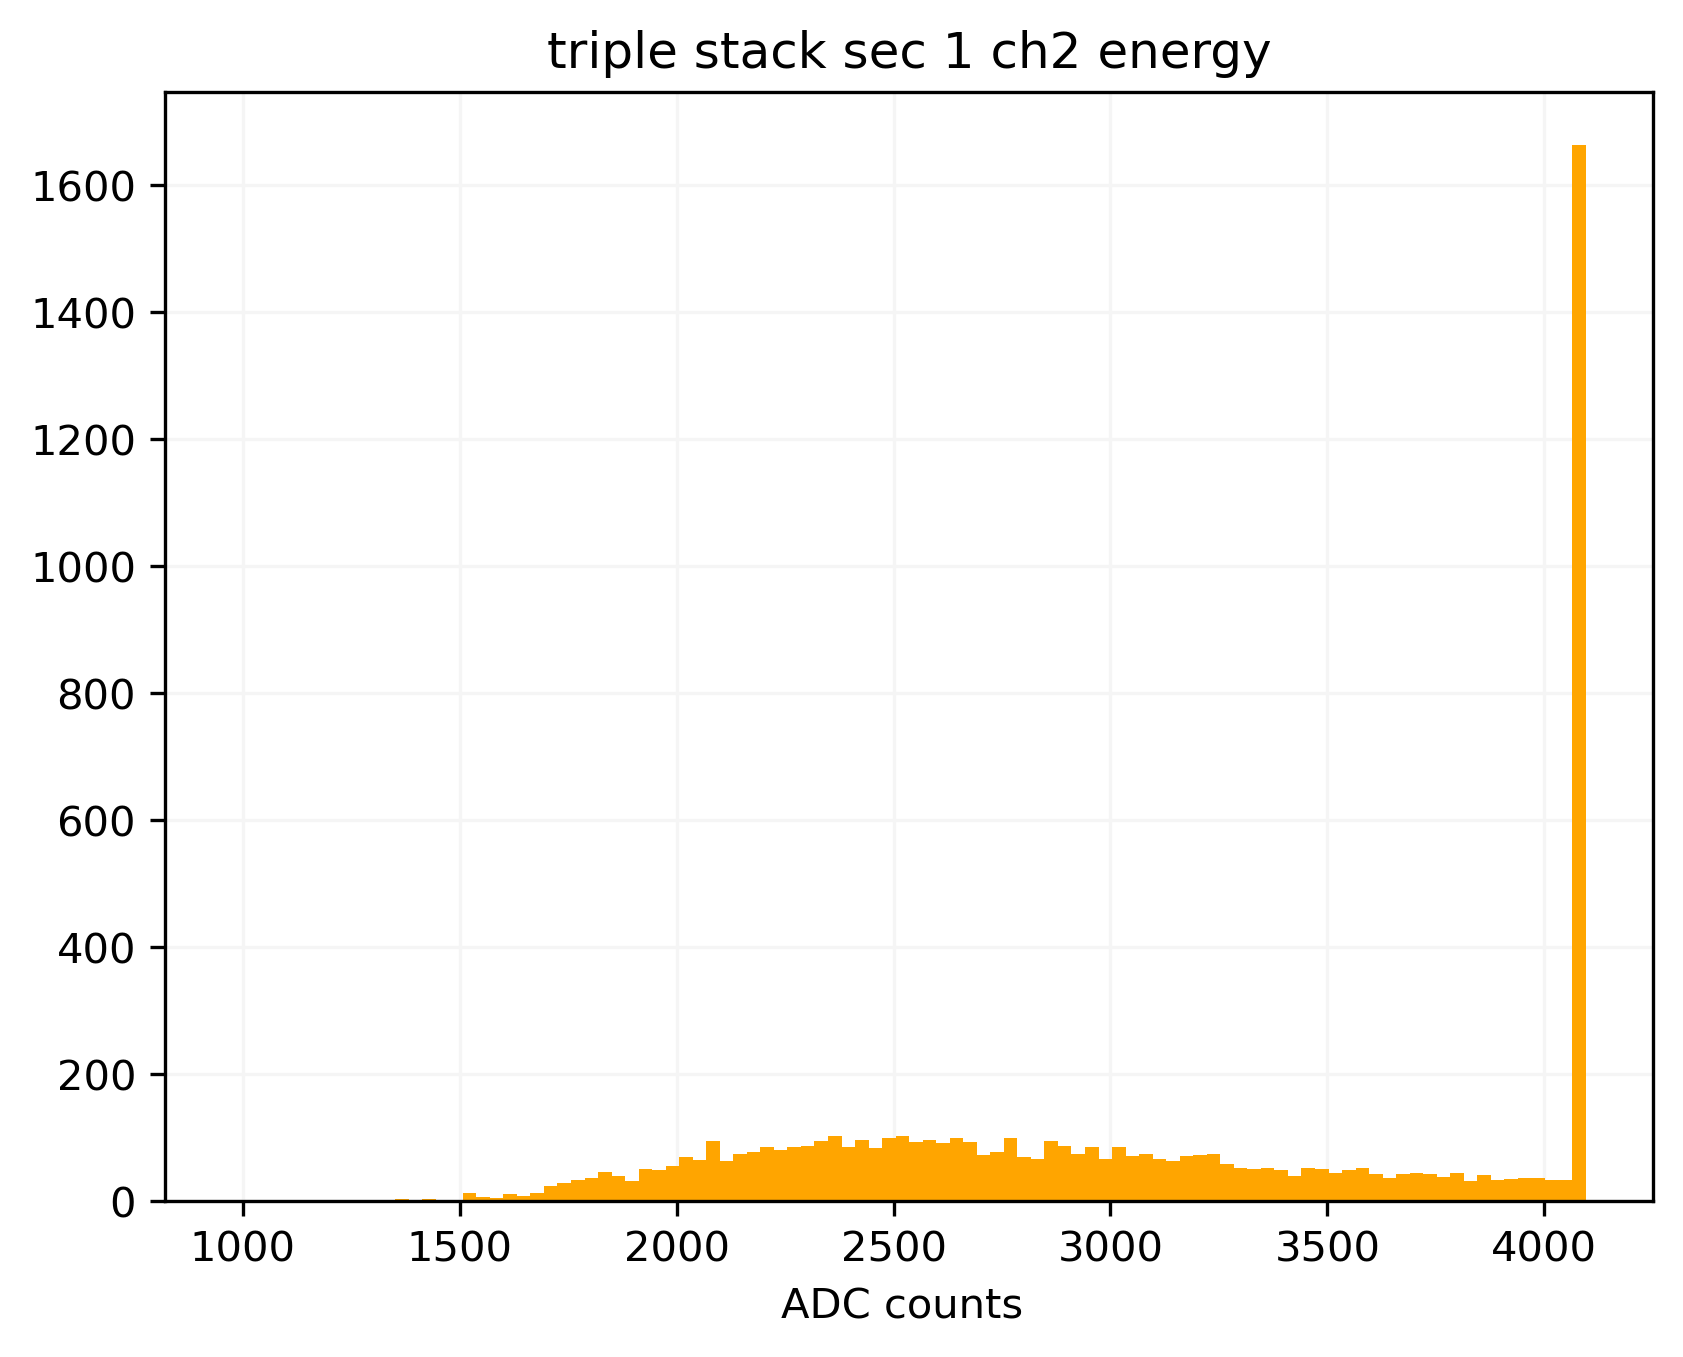

In [64]:
#need to change the type as for some reasong the default one is funny and hist does not like it 
#CH2_energy=CH2_energy.astype(np.int64)
plt.hist(CH2_energy, bins = 100,histtype='stepfilled',color ='orange')
#plt.hist(CH0_time_diff, bins = 100,range=(0,4), histtype='stepfilled' ,density=True,color ='orange')
ax=plt.gca()
ax.set_title("triple stack sec 1 ch2 energy")
ax.set_xlabel("ADC counts ")
#plt.yscale('log')


plt.show()

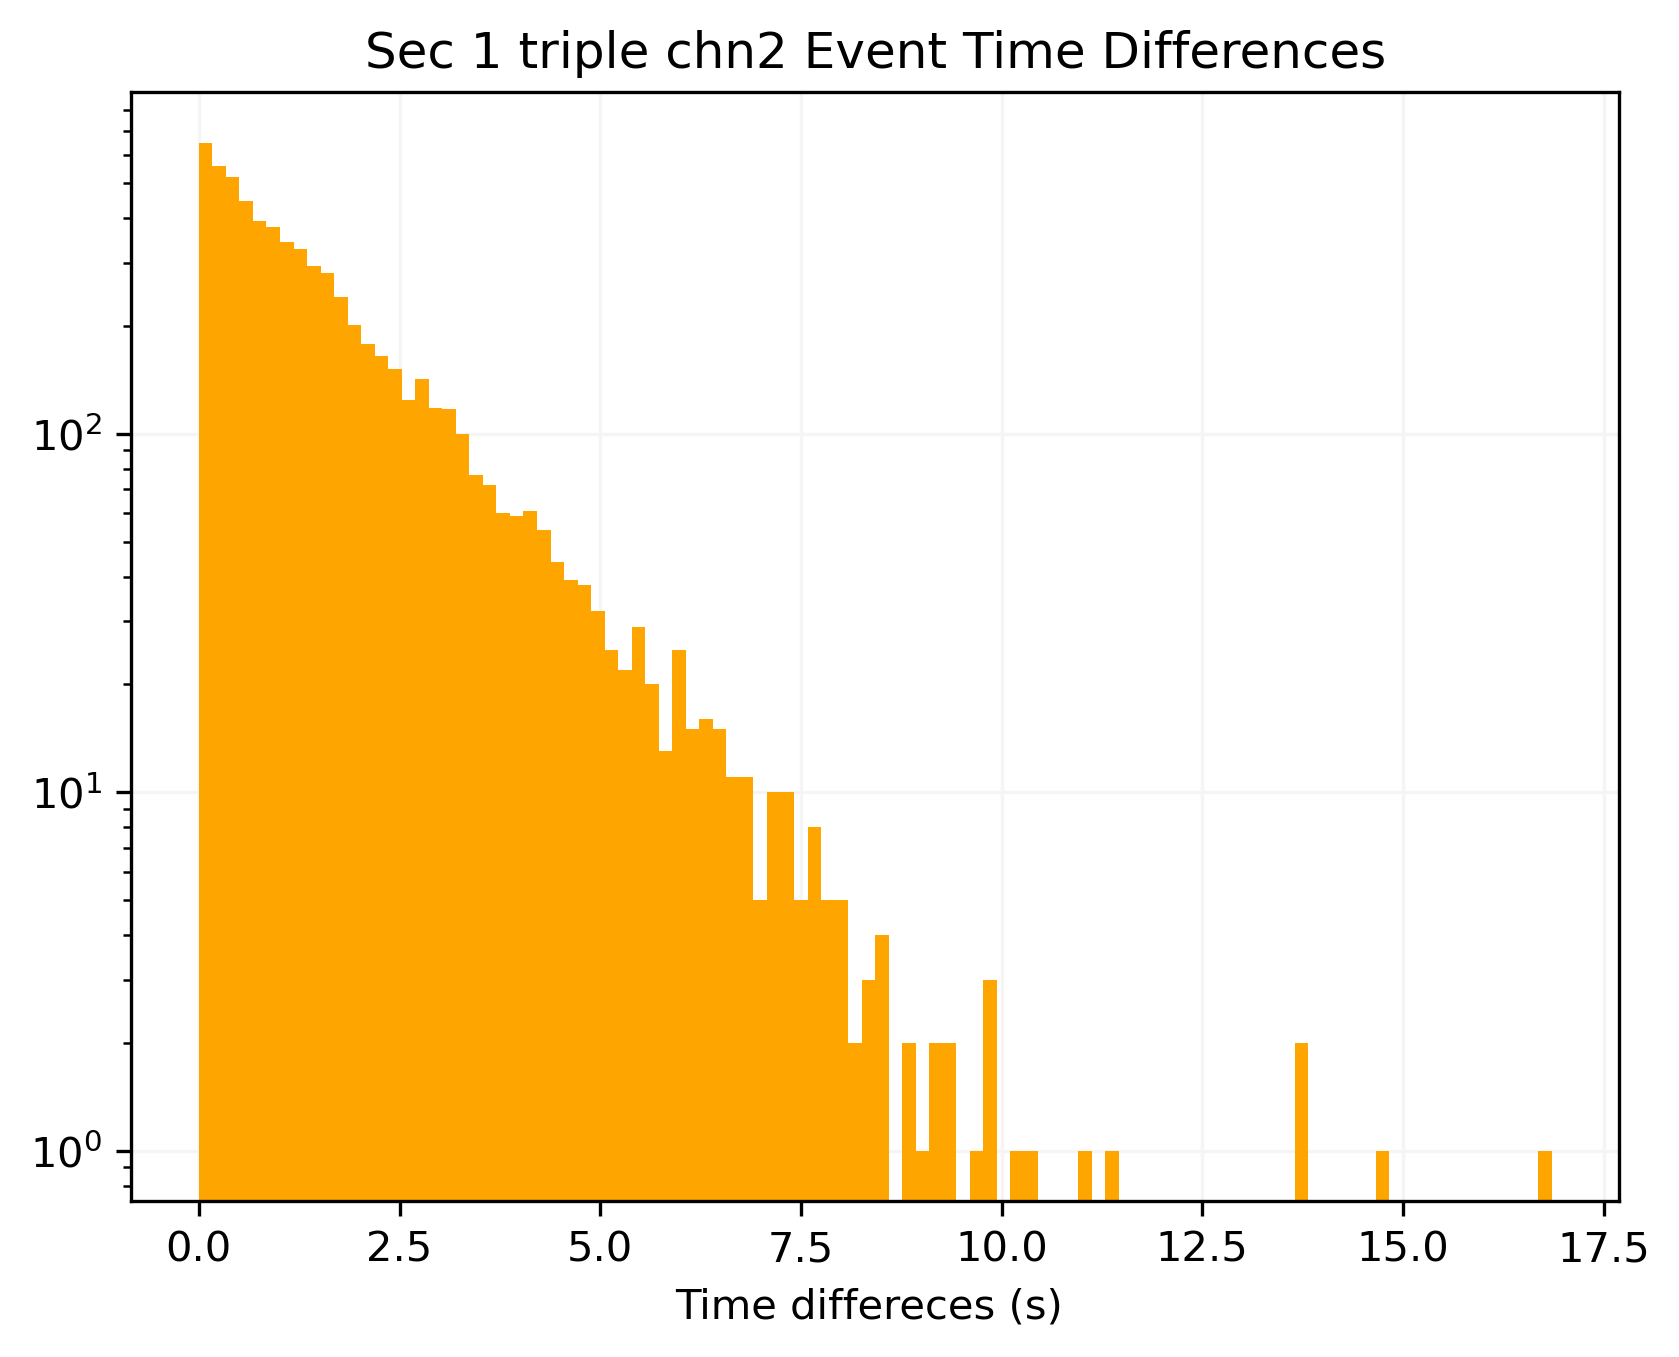

In [65]:
# plot the time differences distribution to see if it looks right 

plt.hist(CH2_time_diff_sec, bins = 100, histtype='stepfilled',color ='orange')
#plt.hist(CH0_time_diff, bins = 100,range=(0,4), histtype='stepfilled' ,density=True,color ='orange')
ax=plt.gca()
ax.set_title("Sec 1 triple chn2 Event Time Differences")
ax.set_xlabel("Time differeces (s) ")
plt.yscale('log')


plt.show()


In [68]:
len(CH2_energy)

6545

Expo function coefficients:
[ 6.1573801  -0.59797715]
Covariance of coefficients:
[[ 8.71701403e-05 -5.21735274e-05]
 [-5.21735274e-05  6.22908727e-05]]
rate err 0.007892456695417896


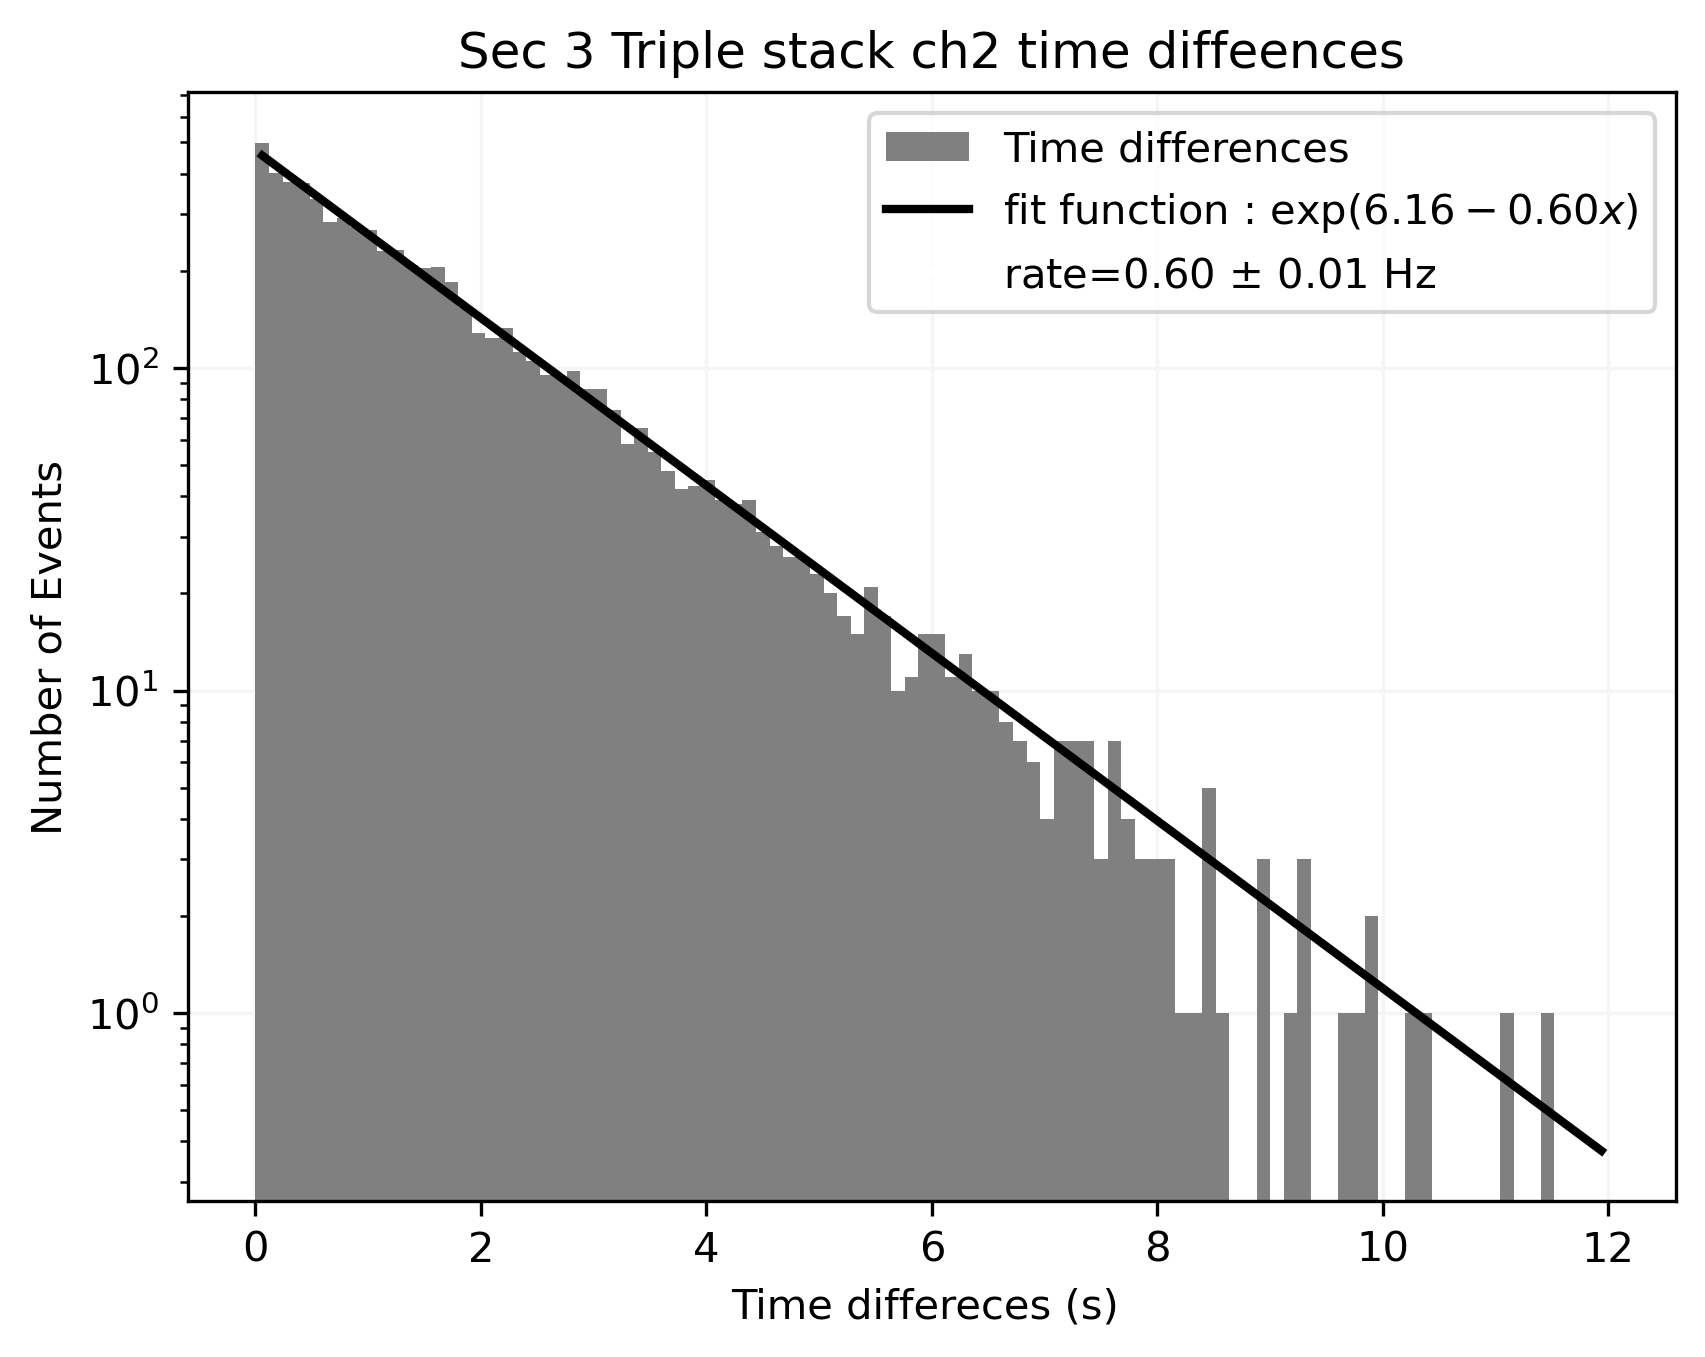

double -0.6144406066814435 triple -0.597977146874966 ratio 0.9732057750945275 error 0.08450885799603881


In [72]:
# now I am going to try and fit the time differences plot with curve_fit

import numpy as np
from scipy.optimize import curve_fit
#firts I define the exponential fucntion that I will be fitting 
def expo(x, a, b):
    return  np.exp(a+(b*x))

#here I caculate the bin centers for the fit               
def bincenters(bins):
    return (bins[1:] + bins[:-1]) / 2

    # define the histogram that I will be fitting to and return the bin contents and the bid edeges    
bin_cont, bin_edges, patches = plt.hist(CH2_time_diff_sec, bins = 100, range=(0,12), histtype='stepfilled' , color ='gray',label ="Time differences")
    
    
    
# here I do the fit a return the fit values     
param3, param_cov3 = curve_fit(expo, bincenters(bin_edges),bin_cont)
                   

      
                   
# print the values     
print("Expo function coefficients:")
print(param3)
print("Covariance of coefficients:")
print(param_cov3)
perr3 = np.sqrt(np.diag(param_cov3))
print ("rate err", perr3[1])


# now I also want to draw the fitted function on top of the histogram 
fit_func= expo(bincenters(bin_edges),param3[0] ,param3[1] )
plt.plot(bincenters(bin_edges), fit_func, 'black', linewidth=2, label ="fit function : exp$({:.2f} {:.2f}x)$".format(param3[0] ,param3[1]))       

#fit_eq= r"exp$({:.2f} {:.2f}x)$".format(param3[0] ,param3[1])

ax=plt.gca()
#ax.text(1, 800, fit_eq, fontsize=15)
#ax.text(2, 100, "rate={:.2f} cps".format(abs(param[1])), fontsize=15)
#ax.text(1.3, 300, "rate={:.2f} $\\pm$ {:.2f} cps".format(abs(param3[1]), perr3[1]), fontsize=15)
ax.plot([],[],label="rate={:.2f} $\\pm$ {:.2f} Hz".format(abs(param3[1]), perr3[1]), color='w')
plt.legend()
plt.yscale('log')
ax.set_title("Sec 3 Triple stack ch2 time diffeences")
ax.set_xlabel("Time differeces (s) ")
ax.set_ylabel('Number of Events')
plt.show()

print("double",param[1], "triple",param3[1], "ratio", param3[1]/param[1], "error", np.sqrt(perr3[1]**2+perr[1]))


In [ ]:
CH2_timestamps_sec=CH2_timestamps/1e+12
CH2_timestamps_min=CH2_timestamps_sec/60
rate_min_2=np.floor(CH2_timestamps_min)
rate_min_2
#len(rate_min_2)

In [ ]:
bins_hist=np.linspace(0,300,301)

In [ ]:

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(12,6))
plt.subplots_adjust(hspace=0)
plt.axes(ax[0])
bin_contents, bin_edges, patches =plt.hist(rate_min_0,bins = bins_hist, histtype='step',color='dimgray',label='double stack')
bin_contents3, bin_edges3, patches3 =plt.hist(rate_min_2,bins = bins_hist, histtype='step',color='black',label='test section')
mean=np.mean(bin_contents)
mean3= np.mean(bin_contents3)
err=np.std(bin_contents)
err3=np.std(bin_contents3)

ax[0] = plt.gca()
ax[0].set_ylabel("Count per minute")
#ax[0].set_ylim([150, 300])
#ax[0].set_xlabel("Minutes from the begining of the run")
#plt.title('Section 2 ( not corrected by area differences)')
#ax[0].legend(loc=(0.4, 0.45))
ax[0].legend(labels=["ref pieces %.2f$\\pm$%.2f cpm" % (mean, err), "test piece  %.2f$\\pm$%.2f cpm " % (mean3, err3)])

sec_area_ratio=1.024 # for sec 1

#ax[1].stairs((bin_contents3*sec_area_ratio)/bin_contents,bin_edges,color='black')
ax[1].stairs((bin_contents3)/bin_contents,bin_edges, color='black')
ax[1].set_ylabel('ratio')
ax[1].set_xlabel("Minutes from the begining of the run")
ratio=mean3/mean
rerr=np.sqrt((err3**2)+(err**2))
print("mean double",np.mean(bin_contents),"mean triple", np.mean(bin_contents3))

ax[1].plot([],[],label='overall %.2f$\\pm$%.2f' % (ratio, rerr), color='w')
#ax[1].plot([],[],label='efficiency %.2f' % (ratio), color='w')
ax[1].legend()


plt.show()
#ax[1].set_xlim(min(bins), max(bins))

In [ ]:
np.mean(bin_contents)

In [ ]:
bin_edges

In [ ]:
bin_edges3

In [ ]:
# Plotting the histogram.
plt.hist(bin_contents, bins=15, density=True, alpha=0.6, color='b')
 


In [ ]:
from scipy.stats import norm

# Plotting the histogram.
plt.hist(bin_contents, bins=15, density=True, alpha=0.6, color='b')
 
mu, std = norm.fit(bin_contents) 
 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()

In [ ]:
bins=np.linspace(0,300,301)

In [ ]:
bins